In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import eigvals
import random
from itertools import combinations

In [13]:
def random_matrix(n):
    """
    Generate a random n by n matrix with entries from -1 to 1 and diagonals as 0.
    """
    # Generate a random n by n matrix with entries from -1 to 1
    mat = np.random.uniform(-1, 1, size=(n, n))
    # Set the diagonal entries to 0
    np.fill_diagonal(mat, 0)
    return mat

def check_condition(G1, G2, kappa):
    """
    Check the condition λmin(G2) > (1/(1-κ))(1+κλmax(G1))
    """
    # Calculate λmax(G1) and λmin(G2)
    lambda_max_G1 = max(eigvals(G1))
    lambda_min_G2 = min(eigvals(G2))
    
    # Check the condition
    if abs(lambda_min_G2) >= (1/(1-kappa))*(1+kappa*lambda_max_G1):
        return True
    else:
        return False

def is_positive_definite(mat):
    """
    Check if a matrix is positive definite.
    """
    return np.all(np.linalg.eigvals(mat) > 0)

In [74]:
n_values = [3, 4, 5, 6, 7, 8, 9, 10]
iterations = 100
kappa = 0.5
false_condition_count = []
positive_definite_count = []
true_condition_positive_definite_count = []

for n in n_values:
    false_condition = 0
    positive_definite = 0
    true_condition_positive_definite = 0
    
    for i in range(iterations):
        G1 = random_matrix(n)
        G2 = 2*random_matrix(n)
        condition_result = check_condition(G1, G2, kappa)
        G = np.identity(n) + kappa * G1 + (1 - kappa) * G2
        is_pd = is_positive_definite(G)
        
        if not condition_result and is_pd:
            false_condition += 1
        if is_pd:
            positive_definite += 1
        if condition_result and is_pd:
            true_condition_positive_definite += 1
    
    false_condition_count.append(false_condition)
    positive_definite_count.append(positive_definite)
    true_condition_positive_definite_count.append(true_condition_positive_definite)

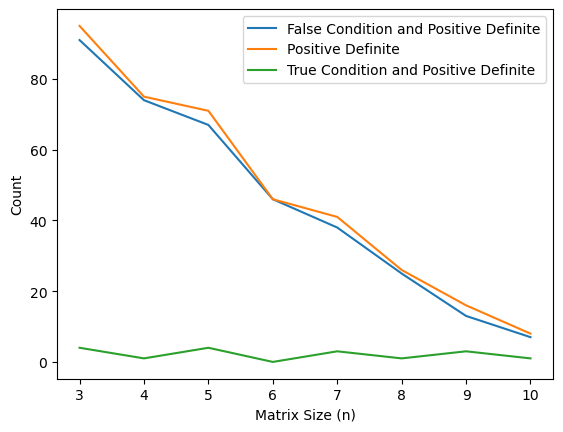

In [76]:
# Plot the results
plt.plot(n_values, false_condition_count, label='False Condition and Positive Definite')
plt.plot(n_values, positive_definite_count, label='Positive Definite')
plt.plot(n_values, true_condition_positive_definite_count, label='True Condition and Positive Definite')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Count')
plt.legend()
plt.savefig('test_prop7.png')
plt.show()

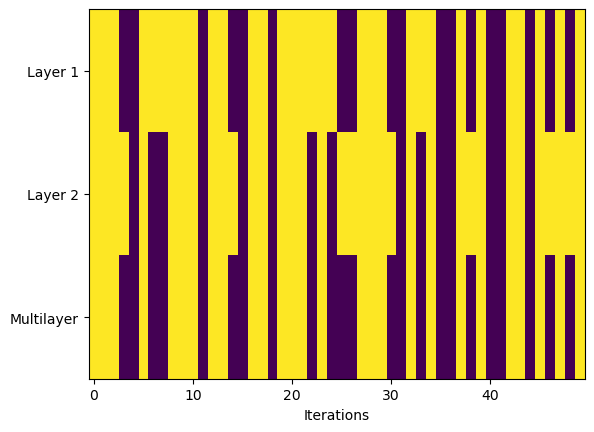

In [77]:
n = 5
kappa = 0.5
iterations = 50

def generate_matrices(n, kappa):
    """
    Generate G1, G2, and G12 matrices.
    """
    G1 = random_matrix(n)
    G2 = random_matrix(n)
    G12 = random_matrix(n)
    return G1, G2, G12

def generate_G(G1, G2, G12):
    """
    Generate the block matrix G.
    """
    n = G1.shape[0]
    G = np.zeros((2*n, 2*n))
    G[:n, :n] = G1
    G[:n, n:] = G12
    G[n:, n:] = G2
    return G

def plot_heatmap(positive_definite_G1, positive_definite_G2, positive_definite_G, iteration):
    """
    Plot the heatmap.
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(np.array([[positive_definite_G1, positive_definite_G2, positive_definite_G]]), cmap='coolwarm', vmin=0, vmax=1)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['I+G1', 'I+G2', 'I+G'])
    ax.set_yticks([])
    ax.set_title(f'Iteration {iteration}')
    plt.show()


pos_G1 = []
pos_G2 = []
pos_G = []
for i in range(iterations):
    G1, G2, G12 = generate_matrices(n, kappa)
    G = generate_G(G1, G2, G12)
    positive_definite_G1 = is_positive_definite(np.identity(n) + G1)
    positive_definite_G2 = is_positive_definite(np.identity(n) + G2)
    positive_definite_G = is_positive_definite(np.identity(2*n) + G)
    pos_G1.append(positive_definite_G1)
    pos_G2.append(positive_definite_G2)
    pos_G.append(positive_definite_G)
    

# Plotting the heatmap
data = np.array([pos_G1, pos_G2, pos_G])

plt.imshow(data, cmap='viridis', interpolation='nearest', aspect='auto')

# Naming the y-ticks
plt.yticks(np.arange(3), ["Layer 1", "Layer 2", "Multilayer"])

# plt.colorbar()
# plt.title('Determinants of Submatrices')
plt.xlabel('Iterations')
# plt.ylabel('Matrices')
plt.savefig('test-prop9.png')
plt.show()

